In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/CNN Stock Prediction"

/content/drive/.shortcut-targets-by-id/11M8JhuGjMeTkxBAoI1sL3lLEa69ylHrV/CNN Stock Prediction


#Load in X_train, X_label, y_train, y_label

In [ ]:
import pandas as pd
stock = 'IBM'

train_features_path = f"data/split/{stock}_train_feature_set.csv"
train_ft_df = pd.read_csv(train_features_path)

train_labels_path = f"data/split/{stock}_train_label_set.csv"
train_labels_df = pd.read_csv(train_labels_path)

test_features_path = f"data/split/{stock}_test_feature_set.csv"
test_ft_df = pd.read_csv(test_features_path)

test_labels_path = f"data/split/{stock}_test_label_set.csv"
test_labels_df = pd.read_csv(test_labels_path)

dataframes = [train_ft_df, train_labels_df, test_ft_df, test_labels_df]

cleaned_dfs = []
for i in range(len(dataframes)):
  df = dataframes[i]
  cleaned_df = df.drop(['Unnamed: 0'], axis=1)
  cleaned_df = cleaned_df.dropna()

  cleaned_dfs.append(cleaned_df)

X_train_all = cleaned_dfs[0]
y_train_set = cleaned_dfs[1]
X_test_all = cleaned_dfs[2]
y_test = cleaned_dfs[3]


Check for NAN Values

In [ ]:
X_train_all.isnull().values.any()

False

In [ ]:
y_train_set.isnull().values.any()

False

DataFrame Sizes Before Choosing Best 225 Features

In [ ]:
print(f"X_train_all shape: {X_train_all.shape}")
print(f"y_train_set labels shape: {y_train_set.shape}")
print(f"X_test_all shape: {X_test_all.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train_all shape: (3115, 420)
y_train_set labels shape: (3115, 1)
X_test_all shape: (779, 420)
y_test labels shape: (779, 1)



In [ ]:
# count train labels
y_train_set.Label.value_counts()

Label
0    2719
2     201
1     195
Name: count, dtype: int64

In [ ]:
# count test labels
y_test.Label.value_counts()

Label
0    680
2     50
1     49
Name: count, dtype: int64

#Retrieve Data with Best Features

In [ ]:
data_path = f"data/features/{stock}_selected_features.csv"
df = pd.read_csv(data_path)

df = df.drop(['Unnamed: 0'], axis=1)

df.head() #(225, 1)

,0
0,RSI_ta_6
1,RSI_ta_7
2,RSI_ta_8
3,RSI_ta_9
4,RSI_ta_10


In [ ]:
# transpose dataframe
max_accuracy_features = df.T

headers = max_accuracy_features.iloc[0]
features = pd.DataFrame(max_accuracy_features.values[1:], columns=headers) # best feature columns (0, 225) shape

features.head()

0,RSI_ta_6,RSI_ta_7,RSI_ta_8,RSI_ta_9,RSI_ta_10,RSI_ta_11,RSI_ta_12,RSI_ta_13,RSI_ta_14,RSI_ta_15,...,AWSM_ta_7,AWSM_ta_8,AWSM_ta_9,AWSM_ta_10,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16


Best 225 Features in the Train Set

In [ ]:
common_cols=list(set.intersection(set(X_train_all), set(features)))
X_train_selected_features = X_train_all[common_cols]

# rearrange to keep the original order of feature columns
X_train_set = X_train_selected_features[list(features.columns)]

print("Shape of Train Features:", X_train_set.shape)

Shape of Train Features: (3115, 225)


Best 225 Features in the Test Set

In [ ]:
common_cols=list(set.intersection(set(X_test_all), set(features)))
X_test_selected_features = X_test_all[common_cols]

# rearrange to keep the original order of feature columns
X_test = X_test_selected_features[list(features.columns)]

print("Shape of Test Features:", X_test.shape)

Shape of Test Features: (779, 225)


In [ ]:
print(f"y_train_set labels shape: {y_train_set.shape}")
print(f"y_test labels shape: {y_test.shape}")

y_train_set labels shape: (3115, 1)
y_test labels shape: (779, 1)


In [ ]:
X_train_set.head()

,RSI_ta_6,RSI_ta_7,RSI_ta_8,RSI_ta_9,RSI_ta_10,RSI_ta_11,RSI_ta_12,RSI_ta_13,RSI_ta_14,RSI_ta_15,...,AWSM_ta_7,AWSM_ta_8,AWSM_ta_9,AWSM_ta_10,AWSM_ta_11,AWSM_ta_12,AWSM_ta_13,AWSM_ta_14,AWSM_ta_15,AWSM_ta_16
0,47.990006,50.211632,51.454054,52.087298,52.338221,52.348572,52.208661,51.976951,51.691720,51.378208,...,1.957143,2.946875,3.311111,3.60475,3.541136,2.699167,2.237692,1.947500,1.428000,1.217969
1,44.355841,47.207888,49.284600,50.851197,52.066571,53.030537,53.808399,54.444368,54.969293,55.405305,...,2.039286,2.006875,1.962500,1.72275,1.410682,1.210625,1.625385,2.073036,2.341333,2.697813
2,41.146379,42.049716,42.535587,42.831382,43.045938,43.229699,43.404925,43.580505,43.759140,43.940813,...,1.801786,1.860000,1.925833,0.91575,-0.455909,-2.041875,-3.258654,-4.358036,-5.328833,-5.831875
3,89.481793,86.988204,84.629898,82.435110,80.416114,78.573461,76.900160,75.385001,74.014888,72.776309,...,3.569286,3.373125,3.186667,3.02725,2.717273,2.183958,1.481731,0.949821,0.560667,0.000781
4,53.802468,55.387964,56.244843,56.646624,56.766439,56.712363,56.552084,56.328474,56.069056,55.791714,...,0.957857,1.864062,2.710833,2.51600,3.494773,4.400000,5.243077,5.453750,5.097167,4.422969


In [ ]:
y_train_set.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [ ]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print("y_test Class Distribution: ")
print(np.asarray((unique, counts)).T)

y_test Class Distribution: 
[[  0 680]
 [  1  49]
 [  2  50]]


#Train and Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

# split train into train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_set, y_train_set, train_size=0.7,
                                                    test_size=0.3, random_state=2, shuffle=True,
                                                    stratify=y_train_set)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (2180, 225)
y_train shape: (2180, 1)
X_val shape: (935, 225)
y_val shape: (935, 1)


In [ ]:
import numpy as np
unique, counts = np.unique(y_val, return_counts=True)
print("y_val Class Distribution: ")
print(np.asarray((unique, counts)).T)

y_val Class Distribution: 
[[  0 816]
 [  1  59]
 [  2  60]]


In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("y_train Class Distribution: ")
print(np.asarray((unique, counts)).T)

y_train Class Distribution: 
[[   0 1903]
 [   1  136]
 [   2  141]]


#Balance Classes on Train Set

In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# encode labels for each class
def sampleDistribution(y):
  y = LabelEncoder().fit_transform(y)
  counter = Counter(y)

  for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
  print("\n")


print("Training Set Label Distribution:")
sampleDistribution(y_train)

Training Set Label Distribution:
Class=0, n=1903 (87.294%)
Class=2, n=141 (6.468%)
Class=1, n=136 (6.239%)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Oversampling the Minority Class

In [ ]:
# # from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks
# from imblearn.over_sampling import RandomOverSampler

# # oversample = RandomOverSampler(sampling_strategy="not majority")
# # # resample the dataset
# # X_over, y_over = oversample.fit_resample(X_train, y_train)

# sampleDistribution(y_train)

# under = TomekLinks()

# X_train, y_train = under.fit_resample(X_train, y_train)
# sampleDistribution(y_train)

# X_train.shape

In [ ]:
# from imblearn.over_sampling import SMOTE

# sampleDistribution(y_train)

# # define oversampling strategy
# over = SMOTE()

# X_train, y_train = over.fit_resample(X_train, y_train)
# sampleDistribution(y_train)


Undersampling the Majority Class

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# # define undersample strategy
# undersample = RandomUnderSampler(sampling_strategy='majority')

# # fit and apply the transform
# X_train_bal, y_train_bal = undersample.fit_resample(X_train, y_train)

# sampleDistribution(y_train_bal)

# X_train = pd.DataFrame(X_train_bal, columns = X.columns) # feature columns
# y_train = pd.DataFrame(y_train_bal, columns = y.columns) # undersampled label columns

# X_train.shape

Combined Oversampling and Undersampling

In [ ]:
# # from imblearn.under_sampling import RandomUnderSampler
# # from imblearn.over_sampling import RandomOverSampler

# from imblearn.combine import SMOTEENN, SMOTETomek

# # resample all but the majority class
# smote_tomek = SMOTETomek(sampling_strategy = 'not majority')

# # resample the dataset
# X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

# sampleDistribution(y_train)

# # X_train = pd.DataFrame(X_train_bal, columns = X.columns) # undersample/oversampled feature columns
# # y_train = pd.DataFrame(y_train_bal, columns = y.columns) # undersample/oversampled label columns

# X_train.shape
# #y_train.shape

Undersampling then Oversampling

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# sampleDistribution(y_train)
# # define undersampling strategy
# under = RandomUnderSampler(sampling_strategy={0:1250})

# X_train, y_train = under.fit_resample(X_train, y_train)
# sampleDistribution(y_train)
# # define oversampling strategy
# over = RandomOverSampler(sampling_strategy = 'not majority')

# X_train, y_train = over.fit_resample(X_train, y_train)

# sampleDistribution(y_train)

Oversampling Using Smote Then Undersampling Using Tomek

In [ ]:
# from imblearn.under_sampling import TomekLinks
# # from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE

# sampleDistribution(y_train)

# # define oversampling strategy
# over = SMOTE()

# X_train, y_train = over.fit_resample(X_train, y_train)
# sampleDistribution(y_train)


# # define undersampling strategy
# under = TomekLinks()

# X_train, y_train = under.fit_resample(X_train, y_train)
# sampleDistribution(y_train)


#Calculate Sample Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# y_integers = np.argmax(y_train, axis=1) # compute_class_weight needs int labels
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
# d_class_weights = dict(enumerate(class_weights))

y_int = y_train.Label.values
y_integers = y_int.astype(int)  # compute_class_weight needs int labels
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
sample_weights = y_integers.copy().astype(float)
for i in np.unique(y_integers):
  sample_weights[sample_weights == i] = class_weights[i]

rand_idx = np.random.randint(0, 100, 30)
print(y_train.iloc[rand_idx])
print(sample_weights[rand_idx])

      Label
1487      0
1967      0
284       1
913       0
2783      0
2399      0
2853      2
2893      0
1203      0
926       0
2783      0
853       0
1203      0
991       0
853       0
641       0
288       0
2136      0
2825      2
134       2
3105      0
1631      0
1581      0
1967      0
111       1
609       0
3040      2
599       0
1056      0
2783      0
[0.38185321 0.38185321 5.34313725 0.38185321 0.38185321 0.38185321
 5.1536643  0.38185321 0.38185321 0.38185321 0.38185321 0.38185321
 0.38185321 0.38185321 0.38185321 0.38185321 0.38185321 0.38185321
 5.1536643  5.1536643  0.38185321 0.38185321 0.38185321 0.38185321
 5.34313725 0.38185321 5.1536643  0.38185321 0.38185321 0.38185321]


# Setup Test Input Images (Normalizing + Encoding)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# min max scalar
MM_SCALER = MinMaxScaler(feature_range=(-1, 1))

# One Hot Encode Labels
"""
0 -> [1, 0, 0]
1 -> [0, 1, 0]
2 -> [0, 0, 1]
"""

'\n0 -> [1, 0, 0]\n1 -> [0, 1, 0]\n2 -> [0, 0, 1]\n'

###Normalize Data

In [ ]:
X_train = MM_SCALER.fit_transform(X_train)
X_val = MM_SCALER.transform(X_val)
X_test = MM_SCALER.transform(X_test)

###Reshape Data into 15x15 Images

In [ ]:
X_train_images = X_train.reshape(X_train.shape[0], 15, 15)
X_val_images = X_val.reshape(X_val.shape[0], 15, 15)
X_test_images = X_test.reshape(X_test.shape[0], 15, 15)

print(f"X_train Images shape: {X_train_images.shape}")
print(f"X_val Images shape: {X_val_images.shape}")
print(f"X_test Images shape: {X_test_images.shape}")

X_train Images shape: (2180, 15, 15)
X_val Images shape: (935, 15, 15)
X_test Images shape: (779, 15, 15)


###Encode Labels

In [ ]:
OHE = OneHotEncoder(sparse=False, categories='auto')

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

y_train = OHE.fit_transform(y_train.reshape(-1, 1)) # Reshapes to a column vector
y_val = OHE.transform(y_val.reshape(-1, 1))
y_test = OHE.transform(y_test.reshape(-1, 1))

y_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(2180, 3)

In [ ]:
print(f"X_train images shape: {X_train_images.shape}")
print(f"y_train labels shape: {y_train.shape}\n")

print(f"X_val images shape: {X_val_images.shape}")
print(f"y_val labels shape: {y_val.shape}\n")

print(f"X_test images shape: {X_test_images.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train images shape: (2180, 15, 15)
y_train labels shape: (2180, 3)

X_val images shape: (935, 15, 15)
y_val labels shape: (935, 3)

X_test images shape: (779, 15, 15)
y_test labels shape: (779, 3)



#CNN

###CNN Implementation

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

!pip install h5py

In [ ]:
params = {
    "input_w": 15,
    "input_h": 15,
    "input_c": 3,
    "num_classes": 3,
    "batch_size": 1024,
    "epochs": 2000
    }

In [ ]:
from tensorflow.keras import regularizers

# CNN model
model = Sequential()
# Conv2D
model.add(Conv2D(filters = 20,
                 kernel_size = 2,
                 strides = 1,
                 padding = 'valid',
                 activation='relu',
                 use_bias = True,
                 kernel_regularizer=regularizers.l2(0.0),
                 kernel_initializer='glorot_uniform',
                 input_shape=(params["input_w"],
                              params["input_h"],
                              params["input_c"])
                  ))

# Dropout
model.add(Dropout(0.22))

# Conv2D
model.add(Conv2D(filters = 40,
                 kernel_size = 2,
                 strides = 2,
                 padding = 'valid',
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.0),
                 kernel_initializer='glorot_uniform',
                 ))

# Dropout
model.add(Dropout(0.05))

# Flatten
model.add(Flatten())

# Dense
model.add(Dense(100, activation='relu'))

# Dropout
model.add(Dropout(0.22))

# Dense
model.add(Dense(3, activation='softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae', 'mse'])

###Model Checkpoint Callbacks

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

best_model_path = "models/stock_cnn_best_model.h5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=100, min_delta=0.0001) # Stops the training early when validation loss stops improving, prevent overfitting

rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.0001) # Adjusts Learning Rate on validation loss

mcp = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='min', save_freq="epoch")  # val_f1_metric

###Train CNN

In [ ]:
# reshape images into 3 channels
X_train_images = np.stack((X_train_images,)*3, axis=-1)
X_val_images = np.stack((X_val_images,)*3, axis=-1)
X_test_images = np.stack((X_test_images,)*3, axis=-1)

In [ ]:
print(f"X_train Images shape: {X_train_images.shape}")
print(f"y_train labels shape: {y_train.shape}\n")

print(f"X_val Images shape: {X_val_images.shape}")
print(f"y_val labels shape: {y_val.shape}\n")

print(f"X_test Images shape: {X_test_images.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train Images shape: (2180, 15, 15, 3)
y_train labels shape: (2180, 3)

X_val Images shape: (935, 15, 15, 3)
y_val labels shape: (935, 3)

X_test Images shape: (779, 15, 15, 3)
y_test labels shape: (779, 3)



In [ ]:
%%time
hist = model.fit(X_train_images, y_train,
          batch_size=params["batch_size"],
          epochs=params["epochs"],
          callbacks=[mcp, rlp],
          validation_data = (X_val_images, y_val),
          sample_weight = sample_weights,
          verbose=1)

Epoch 1/2000
2/3 [===================>..........] - ETA: 0s - loss: 1.0789 - accuracy: 0.4829 - mae: 0.4309 - mse: 0.2112
Epoch 1: val_loss improved from inf to 1.13754, saving model to models/stock_cnn_best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
Epoch 751: val_loss did not improve from 0.77406
3/3 [==============================] - 0s 143ms/step - loss: 0.4371 - accuracy: 0.6151 - mae: 0.2597 - mse: 0.1617 - val_loss: 0.8032 - val_accuracy: 0.5273 - val_mae: 0.2959 - val_mse: 0.1937 - lr: 1.0000e-04
Epoch 752/2000
2/3 [===================>..........] - ETA: 0s - loss: 0.4434 - accuracy: 0.6089 - mae: 0.2581 - mse: 0.1586
Epoch 752: val_loss did not improve from 0.77406
3/3 [==============================] - 1s 161ms/step - loss: 0.4439 - accuracy: 0.6115 - mae: 0.2583 - mse: 0.1594 - val_loss: 0.8135 - val_accuracy: 0.5209 - val_mae: 0.2986 - val_mse: 0.1963 - lr: 1.0000e-04
Epoch 753/2000
2/3 [===================>..........] - ETA: 0s - loss: 0.4205 - accuracy: 0.6143 - mae: 0.2609 - mse: 0.1612
Epoch 753: val_loss did not improve from 0.77406
3/3 [==============================] - 0s 144ms/step - loss: 0.4275 - accuracy: 0.6110 - mae: 0.2619 - mse: 0.1620 - val_loss: 0.8367 

###Model Evaluation

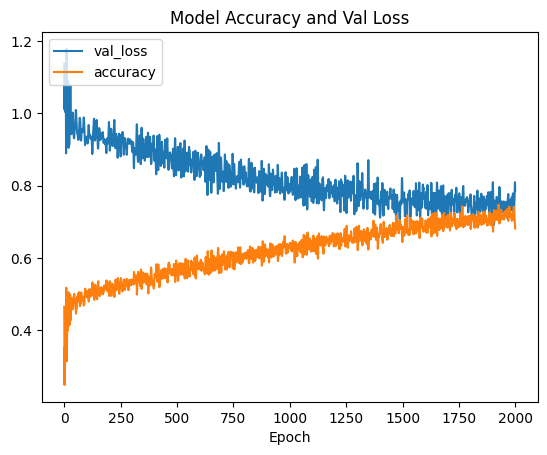

dict_keys(['loss', 'accuracy', 'mae', 'mse', 'val_loss', 'val_accuracy', 'val_mae', 'val_mse', 'lr'])

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])

plt.title(f'Model Accuracy and Val Loss')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'accuracy'], loc='upper left')

plt.show()

# print("Model Accuracy:", hist.history['accuracy'][9])
# print("Model Validation Loss:", hist.history['val_loss'][9])

hist.history.keys()

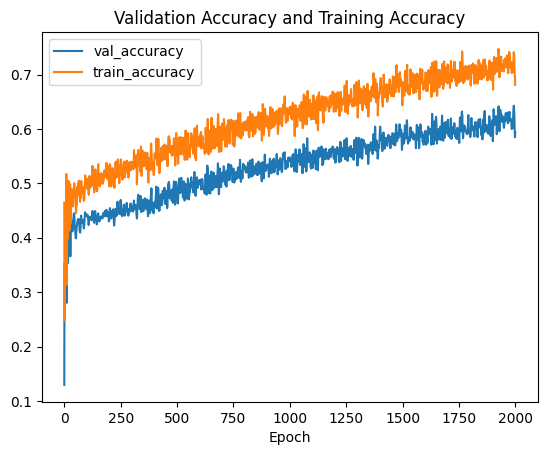

In [ ]:
plt.figure()

plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['accuracy'])

plt.title(f'Validation Accuracy and Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'train_accuracy'], loc='upper left')

plt.show()

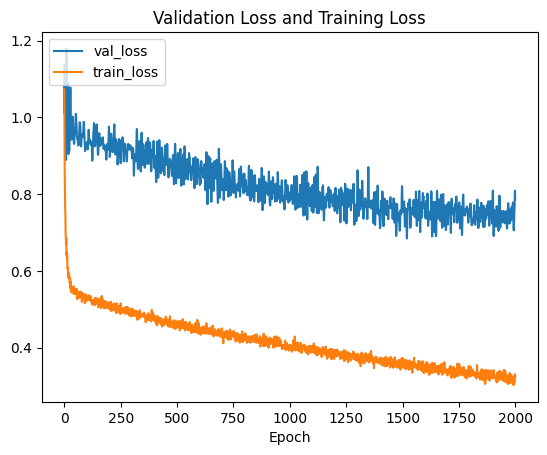

In [ ]:
plt.figure()

plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])

plt.title(f'Validation Loss and Training Loss')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'train_loss'], loc='upper left')

plt.show()

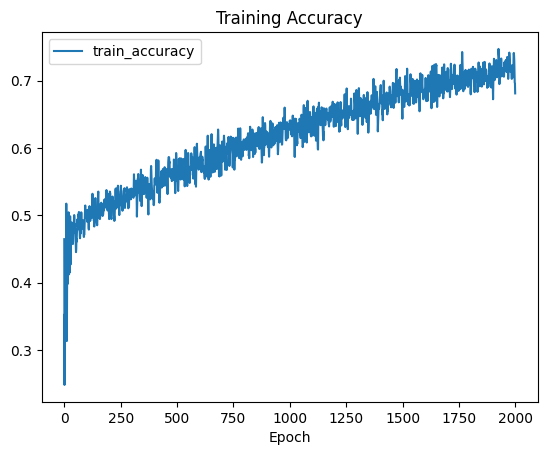

In [ ]:
plt.figure()

plt.plot(hist.history['accuracy'])

plt.title(f'Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy'], loc='upper left')

plt.show()

###Test CNN

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# convert one-hot encoded labels to integer labels
y_true = np.argmax(y_test, axis=1)

# get model predictions
y_predict = model.predict(X_test_images)

# convert predictions to integers
y_predict = np.argmax(y_predict, axis=1)

#rounded_labels = np.argmax(y_test, axis=1) # convert label to single-digit

cm = confusion_matrix(y_true, y_predict)
print(cm)
print(classification_report(y_true, y_predict))

print(len(y_predict))

25/25 [==============================] - 0s 3ms/step
[[404 122 154]
 [ 17  32   0]
 [  8   0  42]]
              precision    recall  f1-score   support

           0       0.94      0.59      0.73       680
           1       0.21      0.65      0.32        49
           2       0.21      0.84      0.34        50

    accuracy                           0.61       779
   macro avg       0.45      0.70      0.46       779
weighted avg       0.85      0.61      0.68       779

779


###Save Model

In [ ]:
#model.save("models/stock_cnn.h5", include_optimizer=True)